In [5]:
import numpy as np
import networkx as nx

# rustworkx visualizer:  https://qiskit.org/documentation/retworkx/apiref/rustworkx.visualization.graphviz_draw.html#rustworkx.visualization.graphviz_draw
import rustworkx as rx
from rustworkx.visualization import graphviz_draw
import pymatching as pm


def pprint(matrix):
    print("\n".join(["\t".join([str(cell) for cell in row]) for row in matrix]))

In [6]:
board = np.arange(0, (4**2) // 2) * 2
board.shape = (4 // 2, 4)
pprint(board)

0	2	4	6
8	10	12	14


In [7]:
bindx2fibindx = {}
fibindx2bindx = {}

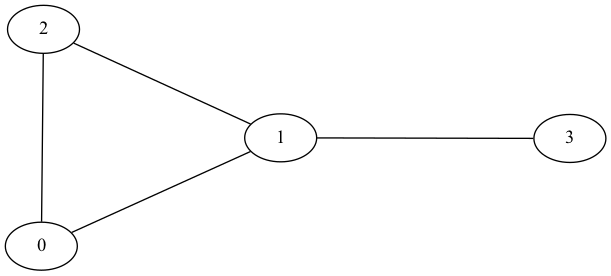

In [14]:
g = rx.PyGraph()

# TODO NOW can re-use pygraph each time just using different syndromes -- could even cache syndromes

fibindx2gindx = {}


weight = "weight"
"""
[[{'time': 0, 'qubits': [2], 'is_boundary': True, 'element': 1},
{'time': 0, 'qubits': [1, 2], 'is_boundary': False, 'element': 1}],
{'time': 0, 'qubits': [2], 'is_boundary': True, 'element': 1},
{'time': 1, 'qubits': [1, 2], 'is_boundary': False, 'element': 1}],
"""
# one syndrome is a parity check between 4 qubits
# don't know if pymatching could handle
{"time": 0, "qubits": [0, 1, 2, 3], "is_boundary": True, "element": 1},
# can I avoid using time?
{"qubits": [0, 1, 2, 3], "is_boundary": True, "element": 1}
# can I avoid boundary?  Does this have to be the expected output? I'm a little scared.  # ask Ben or James something
{"qubits": [0, 1, 2, 3], "element": 1}
# element is gonna be syndrome indx?:
{"qubits": [0, 1, 2, 3], "element": 1}
# can I get away w/ empty nodes?


# # convert syndrome to Pymatching format
# gindx = g.add_node({"qubits": [0,1,2,5], 'element': 1})
# fibindx2gindx[1] = gindx

# gindx = g.add_node({"qubits": [7,4,5,0], 'element': 4})
# fibindx2gindx[4] = gindx

# gindx = g.add_node({"qubits": [4,5,6,1], 'element':5 })
# fibindx2gindx[5] = gindx

# gindx = g.add_node({"qubits": [5,6,7,2], 'element':6 })
# fibindx2gindx[6] = gindx

gindx = g.add_node({"element": 1})
fibindx2gindx[1] = gindx

gindx = g.add_node({"element": 4})
fibindx2gindx[4] = gindx

gindx = g.add_node({"element": 5})
fibindx2gindx[5] = gindx

gindx = g.add_node({"element": 6})
fibindx2gindx[6] = gindx

# TEST only a couple of the actual valid edges:
# Does pymatching need the "error on x causes this edge" information?
g.add_edge(
    fibindx2gindx[4], fibindx2gindx[5], {"fault_ids": {7}}
)  # error on 0 hits stabs on 1
g.add_edge(
    fibindx2gindx[6], fibindx2gindx[4], {"fault_ids": {8}}
)  # error on 0 hits stabs on 4 & 5
g.add_edge(
    fibindx2gindx[1], fibindx2gindx[4], {"fault_ids": {0}}
)  # error on 0 hits stabs on 1 & 4
g.add_edge(
    fibindx2gindx[1], fibindx2gindx[5], {"fault_ids": {4}}
)  # error on 1 hits stabs on 1 & 5
# optionally instead of fibindx2gindx could use the following
# graph_indx = g.nodes().index(2)

graphviz_draw(g, method="sfdp")

In [15]:
pydec = pm.Matching(g)

In [16]:
stab_syndrome = np.zeros(4, dtype=int)
stab_syndrome[fibindx2gindx[1]] = 1  # try to light 1
stab_syndrome[fibindx2gindx[5]] = 1  # try to light 1
print(stab_syndrome)

[1 0 1 0]


In [18]:
res = pydec.decode(stab_syndrome)
# how does it have logical output if I only gave it a graph of syndromes?
print(res)

# # If each edge in the matching graph is assigned a unique integer in its fault_ids attribute,
# # then the locations of nonzero entries in correction correspond to the edges in the MWPM.
# graph_edges = g.edges()
# ans = [graph_edges[eindx] for eindx in range(len(res)) if res[eindx] == 1] # does eindx always line up w graph
# # So just check the index of res that corresponds to the edge crossing the probe and if 1, put 1 else 0 ??????
# # I don't remember what being an edge in the matching graph from Wootons
# print(ans[0])
# print(type(ans[0])) #this is largest fault id + 1 w/ 1s at the fault ids
# print(g.edge_list())

[0 0 0 0 1 0 0 0 0]


In [21]:
{"element": 1} in g.nodes()

True

In [40]:
"""Each fault id corresponds to a self-inverse fault that is flipped when the corresponding edge is flipped. 
These self-inverse faults could correspond to physical Pauli errors (physical frame changes) or
to the logical observables that are flipped by the fault (a logical frame change, equivalent to 
an obersvable ID in an error instruction in a Stim detector error model). 
The fault_ids attribute was previously named qubit_id in an earlier version of PyMatching, 
and qubit_id is still accepted instead of fault_ids in order to maintain backward compatibility. 
"""

'Each fault id corresponds to a self-inverse fault that is flipped when the corresponding edge is flipped. \nThese self-inverse faults could correspond to physical Pauli errors (physical frame changes) or\nto the logical observables that are flipped by the fault (a logical frame change, equivalent to \nan obersvable ID in an error instruction in a Stim detector error model). \nThe fault_ids attribute was previously named qubit_id in an earlier version of PyMatching, \nand qubit_id is still accepted instead of fault_ids in order to maintain backward compatibility. \n'

In [33]:
print(fibindx2gindx[1])
print(fibindx2gindx[5])
print(f"len res: {len(res)}")

0
2
len res: 9
